# 0. Big Picture: What is KNN?

**KNN (K-Nearest Neighbors)** is a very simple, **instance-based** (lazy) learning algorithm.

- For a **new point** $( x_{\text{new}})$:
  1. Look at the **K nearest training points** (neighbors) using a **distance metric** (e.g., Euclidean).
  2. **Classification**: choose the **majority label** among neighbors.
  3. **Regression**: take the **average (or weighted average)** of neighbor values.

> 📌 **KNN does not learn parameters like Linear Regression or Neural Networks.  
> The training data itself acts as the model.**  
This is why KNN is called a **memory-based** or **lazy learner**.


---

# 1. Key Concepts in KNN

## 1.1 Lazy Learning

- **Eager learners** (Logistic Regression, Decision Trees) learn a model function $ f(x) $ during training.
- **KNN is a lazy learner**:
  - It does **not build a model during training**.
  - It simply **stores the training data**.
  - All actual work happens **during prediction**.

### 🔥 Consequences
- **Training time is very fast** (just store data).
- **Prediction time can be slow** (must compute distances to all samples).

---

## 1.2 Instance-Based Learning

KNN makes decisions based on **actual training examples**, not a formula.

- The model does not infer rules.
- For a new point, it checks **similar points from the dataset**.
- The classifier says:
> “Look at the most similar past examples and follow them.”

This is why it works well on small, well-scaled datasets with meaningful distance measures.


# 🚀 2. Distance Metrics (How “near” is measured)

When KNN checks “nearness”, it compares each test sample to all training samples using a **distance function**.  
The choice of **distance metric** affects model performance a lot.

Assume we have two points (vectors):

$$
A = (x_1, x_2, \dots, x_d), \quad B = (y_1, y_2, \dots, y_d)
$$

---

## ✅ 1. Euclidean Distance (L₂ Norm)

> Straight-line distance in $d$-dimensional space (Pythagoras).

#### **For Two Points:**
- First point → $(x_1, y_1)$
- Second point → $(x_2, y_2)$

**General $d$-dimensional form:**

$$
d(A, B) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_d - y_d)^2}
$$

**2D special case:**

For $A = (x_1, y_1)$ and $B = (x_2, y_2)$:

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

**3D special case:**

For $A = (x_1, y_1, z_1)$ and $B = (x_2, y_2, z_2)$:

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}
$$

---

#### **For two vectors:**

- First point → vector $x$ = $(x_1,x_2,...,x_d)$
- Second point → vector $y$ =  $(y_1,y_2,...,y_d)$

$$
x = (x_1, x_2, \dots, x_d)
$$

$$
y = (y_1, y_2, \dots, y_d)
$$

Euclidean distance:

$$
d(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_d - y_d)^2}
$$



- Used for **continuous numeric features**.
- **Sensitive to outliers** (squares amplify large differences).


---

## ✅ 2. Manhattan Distance (L₁ Norm)

Also called **Taxicab / City Block distance**.

$$
d(A, B) = |x_1 - y_1| + |x_2 - y_2| + \dots + |x_d - y_d|
$$


- Like moving on a **grid of streets**.
- More **robust to outliers** than Euclidean.

---

## ✅ 3. Minkowski Distance (General Lₚ Norm)

Generalizes both Euclidean and Manhattan.

$$
d(A, B) = \left( \sum_{j=1}^{d} |x_j - y_j|^p \right)^{\frac{1}{p}}
$$

Special cases:

- $p = 1 \Rightarrow$ Manhattan distance
- $p = 2 \Rightarrow$ Euclidean distance
- $p \to \infty \Rightarrow$ Chebyshev distance

In scikit-learn:

- `metric="minkowski"` and choose `p`.

---

## ✅ 4. Chebyshev Distance (L∞ Norm)

Takes the **maximum** absolute difference among dimensions.

$$
d(A, B) = \max \left( |x_1 - y_1|,\ |x_2 - y_2|,\ \dots,\ |x_d - y_d| \right)
$$

- Like how a **king moves in chess** (max number of steps in any direction).
- Used when only the **largest deviation** matters.

---

## ✅ 5. Hamming Distance (for Categorical/Binary Vectors)

Counts how many positions are **different**.

$$
d(A, B) = \sum_{j=1}^{d} I(x_j \neq y_j)
$$

where the indicator function is:

$$
I(x_j \neq y_j) =
\begin{cases}
1, & x_j \neq y_j \\
0, & x_j = y_j
\end{cases}
$$

- Used for **binary vectors**, **bit strings**, **one-hot encodings**, etc.

---

## 🌟 6. Cosine Distance (Angular Distance)

Cosine distance is derived from **cosine similarity**, which measures the **angle** between two vectors.

**Cosine similarity:**

$$
\text{CosSim}(A, B) = \frac{A \cdot B}{\|A\|\|B\|}
$$

where:

$$
A \cdot B = \sum_{j=1}^{d} x_j y_j
$$

$$
\|A\| = \sqrt{\sum_{j=1}^{d} x_j^2}, \quad \|B\| = \sqrt{\sum_{j=1}^{d} y_j^2}
$$

**Cosine distance:**

$$
d_{\text{cos}}(A, B) = 1 - \text{CosSim}(A, B)
$$

- Focuses on **direction**, not magnitude.
- Great for:
  - Text data (TF–IDF vectors)
  - Embeddings (NLP, deep learning)
  - High-dimensional sparse data.

---

## 🧠 Practical Notes

- For Euclidean / Manhattan / Minkowski → **scale features** (StandardScaler / MinMaxScaler).
- For cosine distance → scaling by a *positive* constant doesn’t change the angle.

---

## 📌 KNN in scikit-learn – Metric Options

```python
metric="euclidean"    # default (equivalent to minkowski with p=2)
metric="manhattan"    # equivalent to minkowski with p=1
metric="minkowski"    # use with parameter p
metric="chebyshev"
metric="hamming"
metric="cosine"
```


| Metric     | Type       | Formula (idea)                                                          | Best For                       | Notes                          |
|-----------|-----------|--------------------------------------------------------------------------|--------------------------------|--------------------------------|
| Euclidean | $L_2$      | $\sqrt{\sum_{j=1}^{d} (x_j - y_j)^2}$                                   | Continuous numeric data        | Sensitive to outliers          |
| Manhattan | $L_1$      | $\sum_{j=1}^{d} \lvert x_j - y_j \rvert$                                | High-dimensional, noisy data   | More robust than Euclidean     |
| Minkowski | $L_p$      | $\left(\sum_{j=1}^{d} \lvert x_j - y_j \rvert^{p}\right)^{1/p}$         | General use                    | Parent of $L_1$ and $L_2$      |
| Chebyshev | $L_\infty$ | $\max_{j} \lvert x_j - y_j \rvert$                                      | Max deviation constraints      | “Chess king” distance          |
| Hamming   | discrete   | $\sum_{j=1}^{d} I(x_j \neq y_j)$                                        | Binary / categorical vectors   | Counts mismatched positions    |
| Cosine    | angular    | $1 - \dfrac{\sum_{j=1}^{d} x_j y_j}{\sqrt{\sum_{j=1}^{d} x_j^{2}}\,\sqrt{\sum_{j=1}^{d} y_j^{2}}}$ | Text, embeddings, sparse data | Direction $>$ magnitude        |


# ➡️ 3 Feature Scaling (Very Important For KNN)

#### KNN is **distance-base**. So features with larger numeric range can dominate the distance.

Example:

- Feature 1: Age in years → [18, 60]
- Feature 2: Income in rupees → [10,000, 1,00,000]

**Income will dominate Euclidean distance if not scaled.**

## 3.1 Why Scaling?

If you don’t scale:
- A difference of `₹50,000` in income might overshadow a difference of `20` years in age.
- KNN will “think” that income is much more important.

## 3.2 Common Scaling Methods

### 1. **MinMaxScaler**

$$x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$

- Scales values to [0, 1] range.
- Good when:
    - You want bounded feature values.
    - Algorithm uses distances or gradients that prefer bounded range.

### 2. **StandardScaler**

$$x' = \frac{x - \mu}{\sigma}$$

- Mean = 0, Standard deviation = 1.
- Good when features are **approximately Gaussian** or you want to center data.

> 🔹 **For KNN**: BOTH MinMaxScaler and StandardScaler are commonly used.<br> Important thing is: **all numeric features must be on similar scale**.

In scikit-learn, we usually wrap scaling + KNN into a Pipeline.


# 4. Choosing K (Number of Neighbors)

#### **K is a hyperparameter that controls the complexity of the model.**

### 4.1 Small K (e.g., K = 1, 3)

- **Low bias, high variance**
- Fits data very closely → can **overfit** (too sensitive to noise).
- Decision boundary can be very wiggly.

### 4.2 Large K (e.g., K = 15, 25, ...)

- **High bias, low variance**
- More stable, smoother boundary.
- Too large K → can **underfit** (too smooth, ignores local structure).

### 4.3 Odd K for binary classification

- To avoid ties (e.g., K=3, 5, 7 etc.) when classes are 2.

### 4.4 How to pick K?

- Use cross-validation:

    - Try K = 1, 3, 5, 7, … etc.

    - Choose K that gives best performance on validation set.
    - We do GridSearchCV.

## ⚙️ **Nuances to Choosing K (Number of Neighbors)**

---

### 🔥 1. Relationship Between K and Dataset Size

There is no universal rule, but a **practical heuristic** is:

> $ K \approx \sqrt{N} $

Where:
- $N$ = number of samples

⚠️ Use it only as a starting point — always validate with cross-validation.

---

### 📏 2. Effect of Distance Metric on K

Choosing a distance metric changes the optimal neighborhood size:

- **Euclidean distance (L2)**  
  Works well with **continuous numeric** features. Often performs better with **smaller K**.
  
- **Manhattan distance (L1)**  
  More robust in **high-dimensional spaces**, where L2 becomes unstable.  
  Often requires **slightly larger K** for stability.

General form of Minkowski distance:
$$
d(x,y) = \left( \sum_{i=1}^{d} |x_i - y_i|^p \right)^{1/p}
$$

- $p = 1$ → Manhattan  
- $p = 2$ → Euclidean

---

### 🔢 3. Odd K — Only Helps for Binary Classification

> Odd K reduces ties **only when number of classes = 2**.

Example:
- For 2 classes → K = 3 avoids 1–1 ties.
- For 3 classes → K = 3 can still tie (1–1–1).

🚫 So don’t rely on K being odd for multiclass problems.

---

### 🧪 4. Cross-Validation to Select K

Best practice:
1. Define a candidate set:  
   $$ K \in \{1,3,5,7,9,\dots\} $$
2. Evaluate using validation accuracy or CV score.
3. Choose the K that maximizes performance on validation data.

👉 We later automate this using `GridSearchCV`.

---

---



# 5. KNN for Classification – Theory

Given:

- Training data: $(x_1, y_1),...,(x_n,y_n)$
- Each $y_i$ is a class label (e.g. 0/1, or “Yes/No”, or multi-class).

To predict label for $x_{\text{new}}$ :

1. Compute distance between $x_{\text{new}}$ and **all** training points.
2. Sort training points by distance.
3. Take **K nearest neighbors.**
4. Count how many neighbors belong to each class.
5. Choose the **majority class**.

Optional: **distance-weighted voting**: closer neighbors have higher weight.

# 6. Code Example: KNN Classifier (scikit-learn)

### Importing Libraries and creating Synthetic Dataset

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Explanation:**

- `make_classification:` to create a synthetic dataset
  
- `train_test_split`: split data into train/test sets.

- `StandardScaler`: to scale features.

- `KNeighborsClassifier`: KNN classifier.

- `Pipeline`: chain scaler + model.

- `Metrics`: `accuracy_score`, `classification_report`, `confusion_matrix`.

In [5]:
x, y = make_classification(
    n_samples= 500, #500 data points
    n_features = 4, #4 input features
    n_informative = 3, #3 are actually useful
    n_redundant = 1, # 1 redundant
    n_classes = 2,  # binary classification
    random_state = 42
)

**Explanation:**

- `x` is a numpy array of shape `(500, 4)` → 500 rows, 4 features.

- `y` is a 1D array of shape `(500,)` with labels 0 or 1.

- `random_state=42`to make results reproducible

#### Splitting into train & test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2, # 20% test
    random_state = 42,
    stratify = y # keep class proportions same in train and test
)

**Explanation:**

- `test_size=0.2` → 80% training, 20% testing.
- `stratify=y` keeps the class distribution similar in both splits.

### **Creating a Pipeline: Scaling + KN**N

In [7]:
knn_clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(
            n_neighbors= 5,       # k = 5
            weights = "uniform",  # each neighbor has equal vote
            metric = "minkowski", # general distance
            p = 2                 # p=2 => Euclidean distance
        ))
    ]
)

**Explanation:**

- `Pipeline([...])` creates a chain:

    1. `"scaler"` step: apply StandardScaler().
    2. `"knn"` step: apply KNN on the scaled data.

- `n_neighbors=5`: using 5 neighbors.
- `weights="uniform"`: all neighbors equal (you can use "distance" to weight closer ones more).
- `metric="minkowski", p=2`: Euclidean distance.

### Training the model


In [8]:
knn_clf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

- Fits the pipeline:

    - First, `StandardScaler` computes mean and std on `X_train` and scales it.
    - Then `KNeighborsClassifier` stores the scaled training data.

### Making Predictions

In [9]:
y_pred = knn_clf.predict(x_test)

- `X_test` will be scaled **using training set stats** (mean & std from `X_train`).
- KNN finds neighbors among the scaled training points.
- Returns predicted labels for each test instance.

### Evaluate Performance

In [10]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"\nConfusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(f"\nClassification Report:\n {classification_report(y_test, y_pred)}")


Accuracy: 0.93

Confusion Matrix:
 [[49  1]
 [ 6 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        50
           1       0.98      0.88      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



- `accuracy_score`: fraction of correct predictions.

- `confusion_matrix`:

        [
            [TN, FP],
            [FN, TP]
        ]


- `classification_report`: gives precision, recall, f1-score for each class.

## 🔢 How Probability is Calculated in KNN

KNN is a **distance-based** algorithm, but probability is computed from the
**labels of the nearest neighbors**, not directly from distances
(except in weighted KNN).

---

# ✅ 1. Standard KNN Probability (Uniform Voting)

After finding the K nearest neighbors:

> Probability = fraction of neighbors belonging to each class.

### 📌 Formula
$$
P(c) = \frac{\text{ number of neighbors with class } c}{K}
$$

### 🧠 Example
Let \(K = 5\)

Neighbors:
- Class A → 3 neighbors
- Class B → 2 neighbors

$$
P(A) = \frac{3}{5} = 0.6
$$
$$
P(B) = \frac{2}{5} = 0.4
$$

👉 Final prediction → **Class A**  
👉 Confidence → **60%**

🔑 No parameters, no model weights — just **local neighbor counts**.

---

# ⭐ 2. Weighted KNN Probability (Distance-Based)

Standard KNN treats all neighbors equally.  
Weighted KNN gives **more influence to closer neighbors**.

### 📌 Step 1 — Compute weights by distance
Common choice:
$$
w_i = \frac{1}{d(x_{\text{new}}, x_i)}
$$

Where:
- $(d(x_{\text{new}}, x_i))$ = distance to neighbor $(i)$

### 📌 Step 2 — Normalize weights to form probabilities
$$
P(c) = \frac{\sum_{i \in neighbors(c)} w_i}{\sum_{j=1}^{K} w_j}
$$

This makes weights behave like probability mass.

---

## 🧠 Weighted Example

Let $( K = 3 )$

Distances:
- Neighbor A1 → $( d = 0.2 )$
- Neighbor B1 → $( d = 1.0 )$
- Neighbor B2 → $( d = 1.0 )$

### Compute weights
- A1: $( 1 / 0.2 = 5 )$
- B1: $( 1 / 1 = 1 )$
- B2: $( 1 / 1 = 1 )$

Total weight:
$$
5 + 1 + 1 = 7
$$

### Probabilities
$$
P(A) = \frac{5}{7} \approx 0.71
$$
$$
P(B) = \frac{2}{7} \approx 0.29
$$

👉 Even though majority votes = 2 vs 1,  
👉 **Class A has higher probability score.**

---

# 🎯 Key Insights

### 🟩 Standard KNN
- **Probability = neighbor vote share**
- All K neighbors have the same influence
- No distance effect after neighbor selection

### 🟦 Weighted KNN
- **Probability = normalized distance weight**
- Closer neighbors contribute more
- More realistic for real-world cases

---

## 🧵 Intuition Recap

> Standard KNN is **democracy** → one vote per neighbor  
> Weighted KNN is **physics** → closer points exert more force

--- 


### Predicting Probabilites

KNN can also estimate **class probabilities:**

In [11]:
y_proba = knn_clf.predict_proba(x_test)
print(y_proba[6])

[0.6 0.4]


For binary classification, each row looks like: `[P(class 0), P(class 1)]`.

For example: `[0.6, 0.4]` → model thinks 60% chance of class 0.

### Visualizing Confusion Matrix

In [12]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

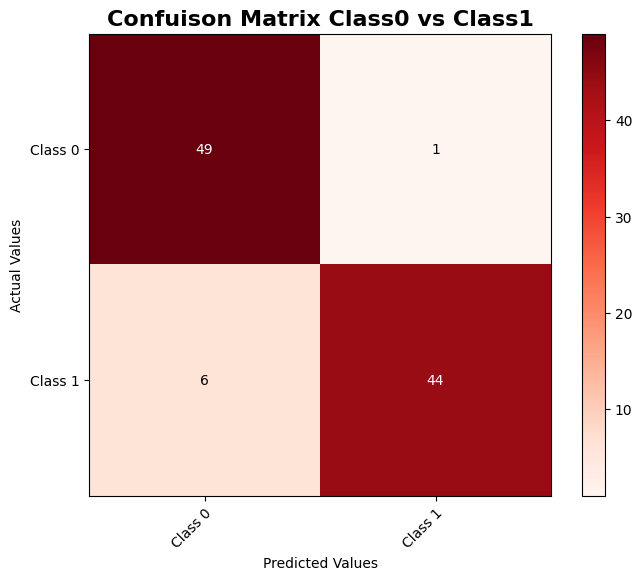

In [13]:
fig = plt.figure(figsize = (8,6))

plot_confusion_matrix(
    confusion_matrix(y_test, y_pred),
    colorbar = True,
    class_names = ["Class 0", "Class 1"],
    cmap = "Reds",
    figure = fig
    
)

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confuison Matrix Class0 vs Class1", fontweight = "bold", fontsize = 16)
plt.show()

### Precision-Recall Curve

In [14]:
from sklearn.metrics import precision_recall_curve

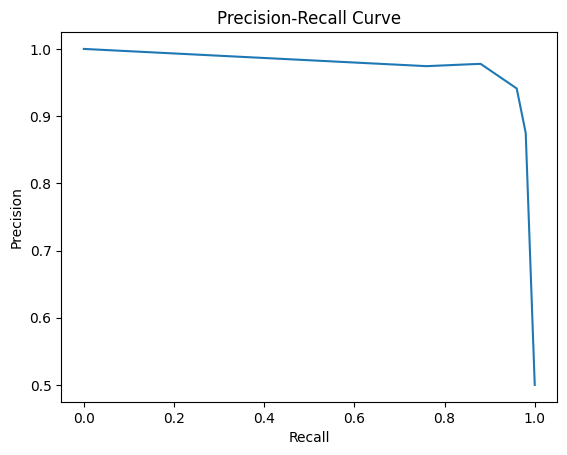

In [15]:
y_prob = knn_clf.predict_proba(x_test)[:,1] #probabilities of prediction 

prec, rec, thresh = precision_recall_curve(y_test, y_prob)

plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


### ROC Curve Plot

In [16]:
from sklearn.metrics import roc_curve

In [17]:
y_pred_prob = knn_clf.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

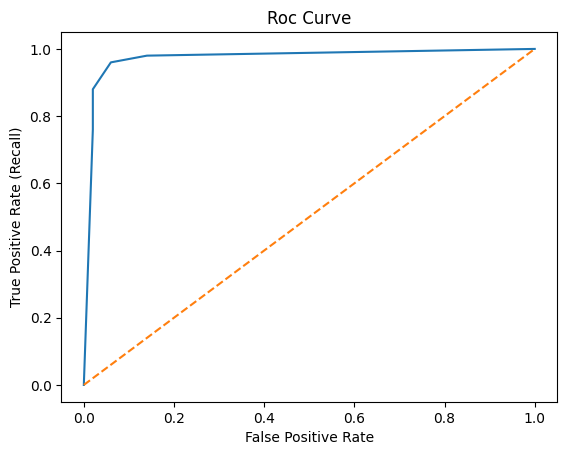

In [18]:
plt.figure()

plt.plot(fpr, tpr) #ROC curve
plt.plot([0,1], [0,1], linestyle = '--') #Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Roc Curve")
plt.show()

### Learning Curves

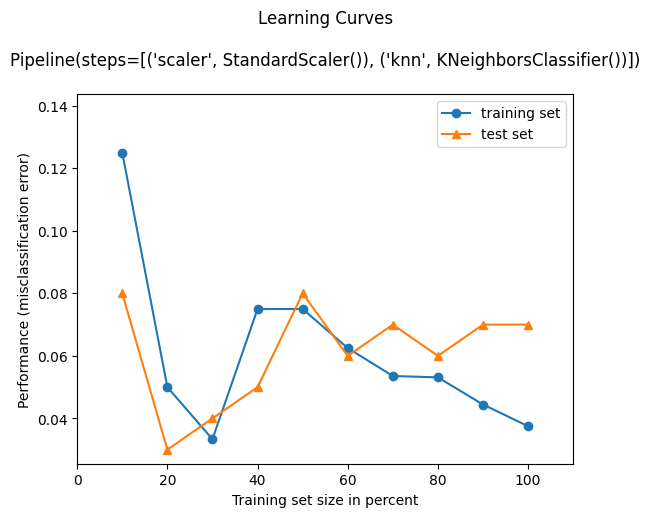

In [19]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(x_train, y_train, x_test, y_test, clf = knn_clf)
plt.show()

# 7. 🌡️ KNN Regression — Theory

In KNN Regression, the target values are **continuous numbers**, not class labels.  
To predict the value of a new point $( x_{\text{new}} )$, we look at the $( K )$ nearest neighbors.

Let the target values of the K nearest neighbors be:

$$
y_{i_1}, y_{i_2}, \dots, y_{i_K}
$$


## 7.1 ⭐ Uniform (Simple) Averaging

Every neighbor contributes **equally**.

$$
\hat{y}_{\text{new}} = \frac{1}{K} \sum_{j=1}^{K} y_{i_j}
$$


## 7.2 ⚖️ Distance-Weighted Averaging

Closer neighbors get **more influence** than farther ones.

$$
\hat{y}_{\text{new}} = \frac{\sum_{j=1}^{K} w_j \, y_{i_j}}{\sum_{j=1}^{K} w_j}
$$

A common weighting choice:

$$
w_j = \frac{1}{d(x_{\text{new}}, x_{i_j}) + \epsilon}
$$

Where:

- $( d(\cdot) )$: distance metric (e.g., Euclidean)
- $( \epsilon )$: a tiny constant to avoid division by zero


In [20]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# creating regression dataset

x_reg, y_reg = make_regression(
    n_samples = 500,
    n_features = 4,
    noise = 20.0,
    random_state = 42,
)

In [22]:
# train_test_split

xr_train, xr_test, yr_train, yr_test = train_test_split(x_reg, y_reg, test_size = 0.2, random_state = 42)

In [23]:
# Pipelining : Scaler + KNN Regresser

knn_reg = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor(
            n_neighbors = 5,
            weights = "distance",
            metric = "minkowski",
            p = 2
        ))
    ]
)


In [24]:
# fitting

knn_reg.fit(xr_train, yr_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(weights='distance'))])

In [29]:
# Predicting

yr_pred = knn_reg.predict(xr_test)

In [31]:
# evaluating

mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

In [32]:
print(f"MSE : {mse}")
print(f"R2 Score: {r2}")

MSE : 0.0
R2 Score: 1.0


**Explanation:**

- `make_regression` creates synthetic regression data.
- `KNeighborsRegressor` used instead of classifier.
- `weights="distance"` → neighbors are weighted inversely by distance.
- `mean_squared_error` and `r2_score` are common regression metrics.

# 8. 🎛️ Hyperparameter Tuning for KNN

KNN performance heavily depends on its hyperparameters.  
These control **how neighbors are selected, weighted, and computed**.


## 🔢 8.1 `n_neighbors` (K)

- Defines **how many neighbors** to consider.
- Small \( K \) → more sensitive, may **overfit**.
- Large \( K \) → smoother, may **underfit**.

👉 Typically odd numbers (3, 5, 7, 9) for binary classification to avoid ties.


## ⚖️ 8.2 `weights`

Determines how each neighbor contributes to prediction.

- `"uniform"` → all neighbors contribute equally
- `"distance"` → closer neighbors have more influence

Example intuition:
- A neighbor at distance 0.1 should matter more than one at distance 2.5.


## 📏 8.3 `metric` and `p`

Controls the **distance formula** used.

Common metrics:
- `"euclidean"`
- `"manhattan"`
- `"minkowski"`
- `"cosine"`
- `"hamming"`

For Minkowski:

$$
d(x, y) = \left( \sum_{j=1}^{d} |x_j - y_j|^p \right)^{\frac{1}{p}}
$$

Where:
- $( p = 1 )$ → Manhattan
- $( p = 2 )$ → Euclidean


## 🚀 8.4 `algorithm`

Controls how neighbors are found efficiently.

- `"auto"` → chooses best method automatically
- `"kd_tree"` → efficient in medium dimension
- `"ball_tree"` → better for higher dimension
- `"brute"` → computes all distances (slow, but exact)

> For small datasets, `"brute"` is fine.  
> For large datasets, tree-based methods speed up prediction.


# 🔃 (Classification) Example for Hyper Parameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11],
    "knn__weights": ["uniform", "distance"],
    "knn__p" : [1, 2] #1 = manhattan, 2 = euclidean
}

In [35]:
grid_search = GridSearchCV(
    estimator = knn_clf,
    param_grid = param_grid,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1
)


In [36]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
print(f"Best params: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_}")

Best params: {'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'distance'}
Best CV accuracy: 0.9525


**Explanation:**

- `knn__n_neighbors`: the `knn` refers to the name of the step in the Pipeline.
- `cv=5`: dataset split into 5 folds for cross-validation.
- `best_params_`: gives the K etc. that worked best on validation.

# 9. 💥 Curse of Dimensionality

As the number of features \( d \) increases:

- Data becomes **sparse** in high-dimensional space.
- Distance between samples becomes **less meaningful**.
- Many points end up at **similar distances** → impossible to tell "nearest" neighbors.

This phenomenon is known as the **Curse of Dimensionality**.

---

## 📉 Effect on KNN

- KNN performance typically **degrades** in high dimensions.
- Model becomes unstable and noisy.
- Distance metrics stop capturing similarity properly.

---

## 🛠️ How to Fix

- 🔪 **Feature Selection**  
  Remove irrelevant/unimportant features.

- 🧠 **Dimensionality Reduction (DR)**
  Techniques like:
  - PCA (Principal Component Analysis)
  - Autoencoders
  - t-SNE / UMAP (for visualization)

These methods compress features into fewer informative dimensions, improving distance quality.

---

# 10. 🔡 Handling Categorical Variables in KNN

KNN uses **distance metrics**, so categorical features must be encoded properly.

---

## 🟦 10.1 One-Hot Encoding (Recommended)

Each category becomes a binary vector.

Example category: `"Color"`  
Possible values: `{Red, Blue, Green}`

Representation:
- Red → `[1, 0, 0]`
- Blue → `[0, 1, 0]`
- Green → `[0, 0, 1]`

Advantages:
- No fake numeric ordering
- Works well with Euclidean or Hamming distance

---

## 🟨 10.2 Ordinal Encoding (Use With Caution)

Assign integer values:

- Low → 1  
- Medium → 2  
- High → 3

⚠️ Only valid if categories are naturally ordered.  
Otherwise, it creates **artificial distance**:

$$
|High - Low| = 2
$$

But in reality the semantic meaning may not support this numerical gap.

---

## 🟥 10.3 Purely Categorical KNN

Some variants use **Hamming distance**:

$$
d(x, y) = \sum_{j=1}^{d} I(x_j \neq y_j)
$$

Where:

$$
I(x_j \neq y_j) =
\begin{cases}
1 & x_j \neq y_j \\
0 & x_j = y_j
\end{cases}
$$

This counts mismatched positions, ideal for text labels or binary features.

---

💡 In scikit-learn, you usually:
- Encode categories
- Scale numeric features
- Then apply KNN


# 11. Missing Values and KNN

#####  **KNN can be used to impute missing values:**

- `Idea`: to fill a missing value in a row, find K nearest rows (neighbors) that have this feature present and take average (for numeric) or majority (for categorical).

```python

    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors = 5)
    x_imputed = imputer.fit_transform(x_with_missing)
    
```

# 12. ⚙️ Computational Complexity & Algorithms

Let:
- $( n )$ = number of training samples
- $( d )$ = number of features


## 🏗️ 12.1 Training Time

KNN does **not learn parameters** — it simply stores the dataset.

$$
\text{Training Complexity} = O(n \cdot d)
$$

There is **no optimization or gradient descent**.
The cost is just reading/processing the input data once.


## 🚀 12.2 Prediction Time (per query)

To classify a single new point:

1. Compute distance to ALL training samples  
2. Sort or select the top $( K )$ nearest neighbors

Distance computations:

$$
O(n \cdot d)
$$

Sorting neighbors (worst case):

$$
O(n \log n)
$$

So overall prediction is approximately:

$$
O(n \cdot d + n \log n)
$$

👉 This becomes expensive when:
- $( n )$ is large (many samples)
- $( d )$ is large (many features)
- Real-time inference is needed


## 🌲 12.3 Speed-Up Techniques

KNN can use spatial index structures:


### 🌳 KD-Tree
- Works well for **medium dimensions**
- Partition space along feature axes
- Efficient for continuous numeric features


### 🟣 Ball Tree
- Better than KD-tree when features are higher dimensional
- Splits space using hyperspheres


### 💪 Brute Force
- Directly computes all distances
- Surprisingly good for **small datasets** or **high dimension**


### 🤖 Auto
- scikit-learn automatically selects best algorithm:
```python
KNeighborsClassifier(algorithm="auto")
```

# 13. 📊 Pros and Cons of KNN

### ✅ 13.1 Advantages

- ✨ **Simple and intuitive**
- 🧠 **No training phase (lazy learning)**
- 🌈 Works well when:
    - **Data is low dimensional**
    - Decision boundary is **non-linear/irregular**

- 🤖 Naturally handles **multi-class classification**
- 🏷️ Easy to interpret — "similar points → similar predictions"

### ❌ 13.2 Disadvantages

- 🐢 **Slow prediction** for large datasets
Must compute distance to **all training points**

- ⚖️ Requires **feature scaling**
Otherwise large-scale features dominate

- 🎯 Sensitive to **irrelevant or noisy features**
- 🧨 Suffers from **curse of dimensionality**
High d → distance loses meaning

- ⚠️ Sensitive to **class imbalance**
Majority neighbors dominate votes

- 🔧 Hyperparameter tuning needed
Choosing good values of:
    - 𝐾
    - distance metric
    - weights

# 14. ⚖️ KNN with Imbalanced Data

When one class appears much more frequently than others,  
KNN will tend to predict the **majority class**, because most neighbors will belong to it.

Example:
- 95% class A
- 5% class B

Even if a point truly belongs to class B,  
its nearest neighbors are likely to be class A → wrong prediction.

---

## 🩹 14.1 How to Fix Class Imbalance

### 💊 1. Use `weights="distance"`

Closer neighbors have more influence:

```python
KNeighborsClassifier(weights="distance")
```
This reduces the effect of far majority samples

---

### 💉 2. Resampling the Dataset

- **Oversample minority class** (e.g. SMOTE)

- **Undersample majority class**

This changes the **class distribution**, not the algorithm.

---

### 📏 3. Use Better Metrics

Accuracy is misleading in imbalanced datasets.

Use:

- Precision
- Recall
- F1-score
- AUC-ROC

Example:
- 95% accuracy can be achieved by predicting only majority class → useless.


# 15. 🧠 Summary / Mental Map of KNN

Think of KNN as **local similarity search**:

> “We don’t learn an equation.  
> We look at similar examples and behave like them.”

---

## 🚦 15.1 What to do before using KNN

- 🧹 Clean the dataset
- 🔢 Encode categorical features
- 📏 Scale numeric features
- 🧰 Choose the right distance metric
- 🔍 Tune \( K \) using validation or cross-validation

---

## 🧩 15.2 When KNN Works Best

- Small or medium-sized datasets
- Low to moderate dimensionality
- Smooth nonlinear decision boundaries
- Continuous numeric features or good categorical encodings

---

## 🚫 15.3 When NOT to use KNN

- Very large datasets (slow prediction)
- High-dimensional feature spaces
- Mixed raw categorical & numeric data without encoding
- Real-time prediction systems
- Strong class imbalance without mitigation

---

## 🎯 15.4 Mental Model to Remember

- **Small \( K \)** → very sensitive → may **overfit**
- **Large \( K \)** → smoother → may **underfit**
- **Scaling is mandatory**
- **Distance metric is the core of KNN**
- **Training is cheap — prediction is expensive**

> In KNN, the **dataset itself is the model**.
